#Predicting 2025 Win Totals for MLB Teams

##Data Collection

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('player_projections_2025.txt', delimiter='\t')

In [ ]:
data = data[data['Team'] != 'OAK']

In [ ]:
lineups = data.groupby('Team')[['Team', 'Name', 'Proj PA']].apply(lambda x : x.nlargest(9, 'Proj PA')).reset_index(drop=True)
rotations = data.groupby('Team')[['Team', 'Name', 'Proj IP']].apply(lambda x : x.nlargest(5, 'Proj IP')).reset_index(drop=True)

In [ ]:
lineups.head()

In [ ]:
rotations.head()

In [ ]:
batters = pd.read_csv('batter_projections_2025.txt', delimiter='\t')

In [ ]:
batters

In [ ]:
pitchers_2023 = pd.read_csv('mlb_player_pitching_adv_2023.csv', usecols=['Player', 'BA','OBP',	'SLG',	'OPS',	'BAbip',	'HR%',	'K%',	'BB%',	'HardH%',	'LD%',	'GB%',	'FB%'])

In [ ]:
pitchers_2023.head()

In [ ]:
pitchers_2024 = pd.read_csv('mlb_player_pitching_adv_2024.csv', usecols=['Player', 'BA','OBP',	'SLG',	'OPS',	'BAbip',	'HR%',	'K%',	'BB%',	'HardH%',	'LD%',	'GB%',	'FB%'])

In [ ]:
pitchers_2024.head()

In [ ]:
pitchers = pitchers_2023.merge(pitchers_2024, on='Player', suffixes=['', '_24'], how='right').dropna()

In [ ]:
pitchers.head()

##Modeling 2025 Pitching Stats Using

Import libraries

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Define X and Y Variables

In [ ]:
X = pitchers[['BA', 'OBP',	'SLG',	'OPS',	'BAbip',	'HR%',	'K%',	'BB%',	'HardH%',	'LD%',	'GB%',	'FB%']]

y_ba = pitchers[['BA_24']]
y_obp = pitchers[['OBP_24']]
y_slg = pitchers[['SLG_24']]

Create the Models

In [ ]:
ba_model = LinearRegression()
obp_model = LinearRegression()
slg_model = LinearRegression()

Splitting Data into Training and Testing

In [ ]:
X_train_ba, X_test_ba, y_train_ba, y_test_ba = train_test_split(X, y_ba)
X_train_obp, X_test_obp, y_train_obp, y_test_obp = train_test_split(X, y_obp)
X_train_slg, X_test_slg, y_train_slg, y_test_slg = train_test_split(X, y_slg)

###Batting Average Model (Linear Regression)

In [ ]:
ba_model.fit(X_train_ba, y_train_ba)

LinearRegression()

In [ ]:
y_pred_ba = ba_model.predict(X_test_ba)

In [ ]:
print('Mean Squared Error:', mean_squared_error(y_test_ba, y_pred_ba))

Mean Squared Error: 0.009493586971463875


###On Base Percentage Model (Decision Tree Regressor)

In [ ]:
obp_model.fit(X_train_obp, y_train_obp)

LinearRegression()

In [ ]:
y_pred_obp = obp_model.predict(X_test_obp)

In [ ]:
print('Mean Squared Error:', mean_squared_error(y_test_obp, y_pred_obp))

Mean Squared Error: 0.007124770416016612


###Slugging Percentage Model (Random Forest Regressor)

In [ ]:
slg_model.fit(X_train_slg, y_train_slg)

LinearRegression()

In [ ]:
y_pred_slg = slg_model.predict(X_test_slg)

In [ ]:
print('Mean Squared Error:', mean_squared_error(y_test_slg, y_pred_slg))

Mean Squared Error: 0.020569597845799717


###Using Models to Predict 2025 Pitching Stats

In [ ]:
pitchers.head()

,Player,BA,OBP,SLG,OPS,BAbip,HR%,K%,BB%,HardH%,...,SLG_24,OPS_24,BAbip_24,HR%_24,K%_24,BB%_24,HardH%_24,LD%_24,GB%_24,FB%_24
0,Logan Gilbert,0.233,0.270,0.409,0.679,0.274,3.8,24.5,4.7,44.6,...,0.353,0.589,0.237,3.2,27.4,4.6,39.4,23.8,44.1,24.4
1,Seth Lugo,0.249,0.296,0.412,0.708,0.298,3.1,23.2,6.0,44.4,...,0.353,0.634,0.278,1.9,21.7,5.7,39.0,24.9,43.6,25.8
2,Logan Webb,0.248,0.280,0.374,0.653,0.303,2.4,22.8,3.6,46.4,...,0.355,0.657,0.316,1.3,20.5,5.9,46.3,23.2,57.1,17.3
3,Zack Wheeler,0.229,0.274,0.364,0.638,0.292,2.5,26.9,5.0,36.5,...,0.328,0.581,0.247,2.5,28.5,6.6,33.7,20.9,42.5,26.0
4,Aaron Nola,0.240,0.283,0.425,0.708,0.286,4.0,25.5,5.7,38.5,...,0.421,0.717,0.294,3.7,24.0,6.1,38.3,24.6,44.2,24.4


In [ ]:
pitchers_25 = pitchers_2024.iloc[:, 1:].fillna(0).values

In [ ]:
pitchers_2024 = pitchers_2024.merge(pd.DataFrame(ba_model.predict(pitchers_25), columns=['BAA']), left_index=True, right_index=True)
pitchers_2024 = pitchers_2024.merge(pd.DataFrame(obp_model.predict(pitchers_25), columns=['OBPA']), left_index=True, right_index=True)
pitchers_2024 = pitchers_2024.merge(pd.DataFrame(slg_model.predict(pitchers_25), columns=['SLGA']), left_index=True, right_index=True)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
pitchers_2024 = pitchers_2024[['Player', 'BAA', 'OBPA', 'SLGA']]

In [ ]:
pitchers_2024['Player'] = pitchers_2024.apply(lambda x : x['Player'].strip('*#?'), axis=1)

In [ ]:
pitchers_2024.head()

,Player,BAA,OBPA,SLGA
0,Logan Gilbert,0.251281,0.313845,0.410652
1,Seth Lugo,0.261557,0.319839,0.418937
2,Logan Webb,0.269256,0.317550,0.417649
3,Zack Wheeler,0.242057,0.313521,0.397933
4,Aaron Nola,0.259839,0.324221,0.431728


##Predicting 2025 Win Totals

Merge Lineups and Rotations with Projected Player Stats

In [ ]:
lineups = lineups.merge(batters[['Name', 'AVG', 'OBP', 'SLG']], on='Name')

In [ ]:
pitchers_2024.rename(columns={'Player':'Name'}, inplace=True)
rotations = rotations.merge(pitchers_2024, on='Name').drop_duplicates(subset='Name')

In [ ]:
lineups.head()

,Team,Name,Proj PA,AVG,OBP,SLG
0,ARI,Corbin Carroll,672.0,0.256,0.345,0.449
1,ARI,Ketel Marte,637.0,0.270,0.350,0.483
2,ARI,Josh Naylor,609.0,0.264,0.330,0.450
3,ARI,Eugenio Suárez,609.0,0.233,0.312,0.414
4,ARI,Geraldo Perdomo,567.0,0.248,0.340,0.355


In [ ]:
rotations.head()

,Team,Name,Proj IP,BAA,OBPA,SLGA
0,ARI,Corbin Burnes,188.0,0.258245,0.326010,0.429014
1,ARI,Zac Gallen,170.0,0.251739,0.317494,0.402795
2,ARI,Merrill Kelly,149.0,0.261935,0.329242,0.439417
3,ARI,Brandon Pfaadt,137.0,0.258271,0.322433,0.432948
4,ATH,Luis Severino,177.0,0.260833,0.329387,0.428897


Calculate Average Stats for Each Team

In [ ]:
team_batting = lineups.groupby('Team')[['AVG', 'OBP', 'SLG']].mean().reset_index()
team_pitching = rotations.groupby('Team')[['BAA', 'OBPA', 'SLGA']].mean().reset_index()

In [ ]:
team_batting.head()

,Team,AVG,OBP,SLG
0,ARI,0.260222,0.335111,0.420333
1,ATH,0.250556,0.311333,0.430222
2,ATL,0.261778,0.336778,0.455222
3,BAL,0.254000,0.329778,0.434667
4,BOS,0.255000,0.325000,0.436667


In [ ]:
team_pitching.head()

,Team,BAA,OBPA,SLGA
0,ARI,0.257547,0.323795,0.426043
1,ATH,0.260197,0.326094,0.430218
2,ATL,0.247429,0.317907,0.409231
3,BAL,0.255349,0.326576,0.422911
4,BOS,0.257193,0.323780,0.414996


Create Functions to Calculate Expected Runs and Runs Allowed

$Runs Scored = -598.25 - 36.82 * BA + 1976.56 * OBP + 1663.87 * SLG$

In [ ]:
def runs(team):
  return -598.25 - (36.82 * team['AVG']) + (1976.56 * team['OBP']) + (1663.87 * team['SLG'])

In [ ]:
team_batting['Proj RS'] = team_batting.apply(lambda x : runs(x), axis=1)

In [ ]:
team_batting.head()

,Team,AVG,OBP,SLG,Proj RS
0,ARI,0.260222,0.335111,0.420333,753.915859
1,ATH,0.250556,0.311333,0.430222,723.727407
2,ATL,0.261778,0.336778,0.455222,815.203426
3,BAL,0.254000,0.329778,0.434667,767.452111
4,BOS,0.255000,0.325000,0.436667,761.299467


$Runs Allowed = -265.87 - 1372.39 * BAA + 2124.28 * OBPA + 1628.86 * SLGA$

In [ ]:
def runs_allowed(team):
  return -265.87 - (1372.39 * team['BAA']) + (2124.28 * team['OBPA']) + (1628.86 * team['SLGA'])

In [ ]:
team_pitching['Proj RA'] = team_pitching.apply(lambda x : runs_allowed(x), axis=1)

In [ ]:
team_pitching.head()

,Team,BAA,OBPA,SLGA,Proj RA
0,ARI,0.257547,0.323795,0.426043,762.470237
1,ATH,0.260197,0.326094,0.430218,770.518915
2,ATL,0.247429,0.317907,0.409231,736.463794
3,BAL,0.255349,0.326576,0.422911,766.292923
4,BOS,0.257193,0.323780,0.414996,744.928974


Merging Team Hitting and Pitching

In [ ]:
teams = team_batting[['Team', 'Proj RS']].merge(team_pitching[['Team', 'Proj RA']], on='Team')

In [ ]:
teams.head()

,Team,Proj RS,Proj RA
0,ARI,753.915859,762.470237
1,ATH,723.727407,770.518915
2,ATL,815.203426,736.463794
3,BAL,767.452111,766.292923
4,BOS,761.299467,744.928974


Predicting Win Totals

$Wins = 81 + .08853 * Run Diff$

In [ ]:
def wins(team):
  run_diff = team['Proj RS'] - team['Proj RA']
  return 81 + .08853 * run_diff

In [ ]:
teams['Proj Wins'] = teams.apply(lambda x : wins(x), axis=1)

In [ ]:
teams[['Team', 'Proj Wins']].sort_values(by='Proj Wins')

,Team,Proj Wins
6,CHW,71.697665
9,COL,72.029734
15,MIA,75.015766
29,WSN,75.023935
8,CLE,75.851228
24,SFG,76.108540
1,ATH,76.857548
16,MIL,77.165428
23,SEA,77.215575
10,DET,77.412189


##Visualization

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

Plotting Projected Runs Scored vs Runs Allowed

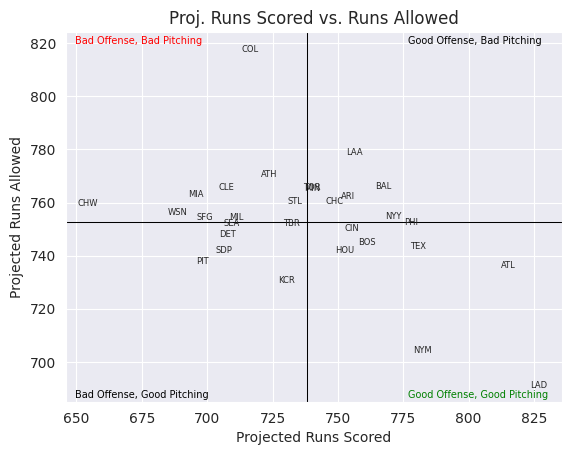

In [ ]:
avg_rs = teams['Proj RS'].mean()
avg_ra = teams['Proj RA'].mean()

min_rs = teams['Proj RS'].min()
min_ra = teams['Proj RA'].min()

max_rs = teams['Proj RS'].max()
max_ra = teams['Proj RA'].max()

sns.scatterplot(x='Proj RS', y='Proj RA', data=teams, alpha=0)

plt.axvline(avg_rs, color='black', lw=.75)
plt.axhline(avg_ra, color='black', lw=.75)

plt.text(min_rs - 5, min_ra - 5, 'Bad Offense, Good Pitching', size=7, color='black')
plt.text(min_rs - 5, max_ra + 2, 'Bad Offense, Bad Pitching', size=7, color='red')
plt.text(max_rs - 50, min_ra - 5, 'Good Offense, Good Pitching', size=7, color='green')
plt.text(max_rs - 50, max_ra + 2, 'Good Offense, Bad Pitching', size=7, color='black')

for i, team in teams.iterrows():
    plt.text(team['Proj RS'], team['Proj RA'], team['Team'], fontsize=6, ha='center', va='center')

plt.xlabel('Projected Runs Scored')
plt.ylabel('Projected Runs Allowed')
plt.title('Proj. Runs Scored vs. Runs Allowed')
sns.set_style('dark')
plt.grid(True)

plt.show()